In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("mini project_data.csv")

In [4]:
data.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [5]:
data.columns

Index(['Filename', 'ExpCDR', 'Eye', 'Set', 'Glaucoma'], dtype='object')

In [6]:
data.describe(include = "all")

,Filename,ExpCDR,Eye,Set,Glaucoma
count,650,650.000000,650,650,650.000000
unique,650,NaN,2,2,NaN
top,001.jpg,NaN,OD,A,NaN
freq,1,NaN,327,325,NaN
mean,NaN,0.576308,NaN,NaN,0.258462
std,NaN,0.116395,NaN,NaN,0.438126
min,NaN,0.161000,NaN,NaN,0.000000
25%,NaN,0.496675,NaN,NaN,0.000000
50%,NaN,0.567650,NaN,NaN,0.000000
75%,NaN,0.648475,NaN,NaN,1.000000


In [7]:
data['Eye'].unique()
data['Set'].unique()
data['Glaucoma'].unique()
data['eye'] = data["Eye"].map({'OD':1,'OS':0})
data['set'] = data["Set"].map({'A':0,'B':1})

data.head()

,Filename,ExpCDR,Eye,Set,Glaucoma,eye,set
0,001.jpg,0.7097,OD,A,0,1,0
1,002.jpg,0.6953,OS,A,0,0,0
2,003.jpg,0.9629,OS,A,0,0,0
3,004.jpg,0.7246,OD,A,0,1,0
4,005.jpg,0.6138,OS,A,0,0,0


In [8]:
img_dir = 'Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2'

In [9]:
import os
import cv2
import numpy as np

# Directory containing the images
img_dir = '/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2'

# Subdirectories for Train and Validation
a = ['Train', 'Validation']
b = ['Glaucoma_Positive', 'Glaucoma_Negative']

# Initialize lists to store data and labels
data_img = []
label = []

for i in a:
    path1 = os.path.join(img_dir, i)
    print(path1)
    
    for j in b:
        if j == '.DS_Store':
            continue
        
        path2 = os.path.join(path1, j)
        print(path2)
        
        for k in os.listdir(path2):
            img_path = os.path.join(path2, k)
            img = cv2.imread(img_path)
            
            # Check if the image was read successfully
            if img is None:
                print(f"Unable to read image: {img_path}")
                continue
            
            # Resize and normalize the image
            img = cv2.resize(img, (75, 75))
            img = img.astype(np.float32) / 255.0
            
            # Append the image data and label
            data_img.append(img)
            if j == 'Glaucoma_Positive':
                label.append(1)
            else:
                label.append(0)



/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Train
/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Train/Glaucoma_Positive
/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Train/Glaucoma_Negative
/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Validation
/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Validation/Glaucoma_Positive
/Users/jainivedhitha/Downloads/Fundus_Scanes_Sorted-2/Validation/Glaucoma_Negative


In [10]:
# Convert the lists to numpy arrays for further processing
data_array = np.array(data_img)
label_array = np.array(label)

# Print the shape of the data arrays
print('Shape of data_array:', data_array.shape)
print('Shape of label_array:', label_array.shape)


Shape of data_array: (660, 75, 75, 3)
Shape of label_array: (660,)


In [11]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(data_array,label_array,
                                                test_size = 0.3,random_state = 22, shuffle = True)

print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(462, 75, 75, 3)
(462,)
(198, 75, 75, 3)
(198,)


In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16


In [14]:
base_model = VGG16(weights='imagenet',
                   include_top=False,input_shape = (75,75,3))

In [15]:
x = Dense(20,activation = 'softmax')(base_model.output)
model = Model(inputs = base_model.input, outputs = x)

In [16]:
model.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0     

In [18]:
img_array = preprocess_input(data_array)

In [19]:
features = model.predict(img_array)

21/21 [==============================] - 6s 264ms/step


In [20]:
features

array([[[[6.04508538e-03, 4.88585556e-07, 8.79159808e-01, ...,
          1.29180856e-03, 1.63575949e-03, 4.33198584e-05],
         [6.75736591e-02, 3.76370997e-04, 7.37535655e-01, ...,
          1.01993969e-02, 2.96653900e-02, 1.71966758e-03]],

        [[1.66365102e-01, 1.15482847e-03, 2.55855620e-01, ...,
          1.34384289e-01, 1.07685111e-01, 7.86430240e-02],
         [5.74326627e-02, 1.38411671e-02, 6.02172539e-02, ...,
          5.60017340e-02, 3.27722609e-01, 6.47245124e-02]]],


       [[[6.21084310e-03, 4.91649928e-07, 8.56403530e-01, ...,
          1.23586773e-03, 1.59510842e-03, 4.76699388e-05],
         [6.84853792e-02, 3.52350646e-04, 7.40595341e-01, ...,
          1.11442218e-02, 2.66100634e-02, 1.87503791e-03]],

        [[1.64147958e-01, 1.23360415e-03, 2.45499074e-01, ...,
          1.24593176e-01, 1.01728208e-01, 8.73495936e-02],
         [6.43343031e-02, 1.51814744e-02, 5.77480011e-02, ...,
          5.84152341e-02, 2.99668133e-01, 7.20237494e-02]]],


       [[[6.

In [17]:
fea_train = model.predict(x_train)

15/15 [==============================] - 4s 264ms/step


In [18]:
fea_train = fea_train.reshape(fea_train.shape[0], -1)

In [19]:
fea_val = model.predict(x_test)

7/7 [==============================] - 2s 237ms/step


In [20]:
fea_val = fea_val.reshape(fea_val.shape[0], -1)

In [21]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics

In [22]:
model_rf = RandomForestClassifier(2000,verbose = 2)

model_rf.fit(fea_train,y_train)

rf_pred = model_rf.predict(fea_val)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished


In [23]:

acc_rf = metrics.accuracy_score(rf_pred,y_test)

acc_rf

0.7373737373737373

In [24]:
report_rf = classification_report(rf_pred,y_test)

In [25]:
report_rf

'              precision    recall  f1-score   support\n\n           0       0.93      0.77      0.85       184\n           1       0.09      0.29      0.13        14\n\n    accuracy                           0.74       198\n   macro avg       0.51      0.53      0.49       198\nweighted avg       0.87      0.74      0.79       198\n'

Accuracy: 0.7373737373737373
AUC: 0.51058352402746


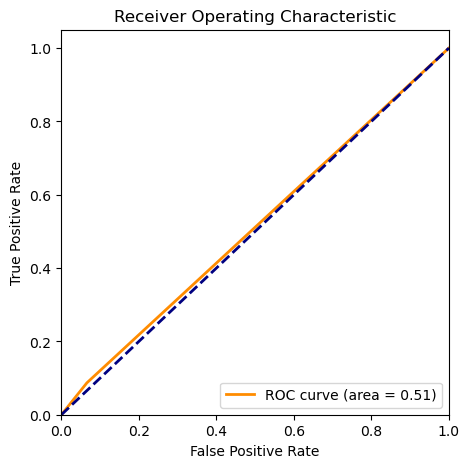

In [26]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred)

# Calculate AUC (Area Under the Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print the accuracy and AUC
print("Accuracy:", acc_rf)
print("AUC:", roc_auc_rf)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

model_svm = svm.SVC(kernel = 'linear')
model_svm.fit(fea_train,y_train)
svm_pred = model_svm.predict(fea_val)
kfold = KFold(n_splits=15, shuffle=True, random_state=0)
scores_vgg = cross_val_score(model_svm,fea_train, y_train, cv=kfold)

In [28]:

acc_svm = scores_vgg.mean()

acc_svm

0.7356989247311828

Accuracy: 0.7356989247311828
AUC: 0.5


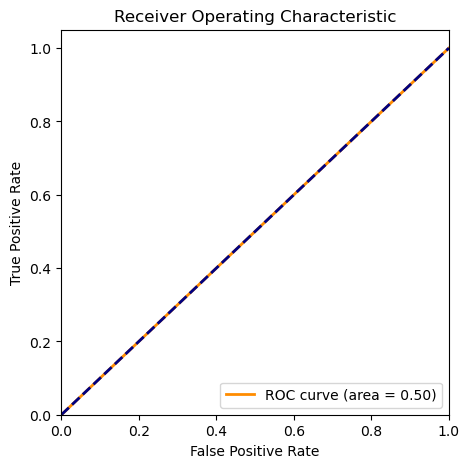

In [29]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_pred)

# Calculate AUC (Area Under the Curve)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Print the accuracy and AUC
print("Accuracy:", acc_svm)
print("AUC:", roc_auc_svm)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
model_lr = LogisticRegression()

model_lr.fit(fea_train,y_train)

lr_pred = model_lr.predict(fea_val)



In [31]:
acc_lr = metrics.accuracy_score(lr_pred,y_test)
acc_lr


0.7676767676767676

Accuracy: 0.7676767676767676
AUC: 0.5


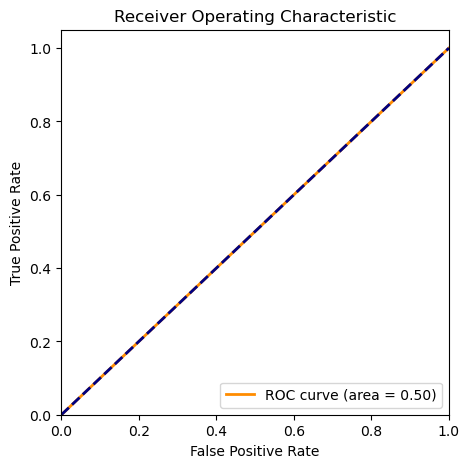

In [32]:

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_pred)

# Calculate AUC (Area Under the Curve)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Print the accuracy and AUC
print("Accuracy:", acc_lr)
print("AUC:", roc_auc_lr)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
model_bg = BaggingClassifier(base_estimator = None,n_estimators = 20,
                             max_samples = 1.0,max_features = 1.0,bootstrap = True,
                             bootstrap_features = False, oob_score = False, warm_start = False,
                             n_jobs = None, random_state = 20, verbose = 2)

model_bg.fit(fea_train,y_train)

pred_bg = model_bg.predict(fea_val)


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...


/Users/jainivedhitha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run (total 20)...
Building estimator 17 of 20 for this parallel run (total 20)...
Building estimator 18 of 20 for this parallel run (total 20)...
Building estimator 19 of 20 for this parallel run (total 20)...
Building estimator 20 of 20 for this parallel run (total 20)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [34]:

acc_bg = metrics.accuracy_score(pred_bg,y_test)

acc_bg

0.7323232323232324

Accuracy: 0.7323232323232324
AUC: 0.522454233409611


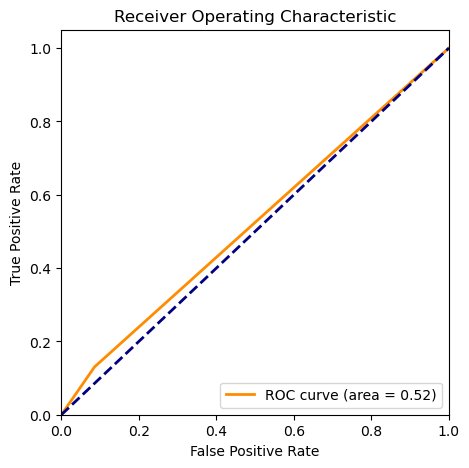

In [35]:
fpr_bg, tpr_bg, thresholds_bg = roc_curve(y_test, pred_bg)

# Calculate AUC (Area Under the Curve)
roc_auc_bg = auc(fpr_bg, tpr_bg)

# Print the accuracy and AUC
print("Accuracy:", acc_bg)
print("AUC:", roc_auc_bg)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_bg, tpr_bg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_bg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

model_dt.fit(fea_train,y_train)

pred_dt = model_dt.predict(fea_val)


In [37]:

acc_dt = metrics.accuracy_score(pred_dt,y_test)

acc_dt

0.6464646464646465

Accuracy: 0.6464646464646465
AUC: 0.5347540045766591


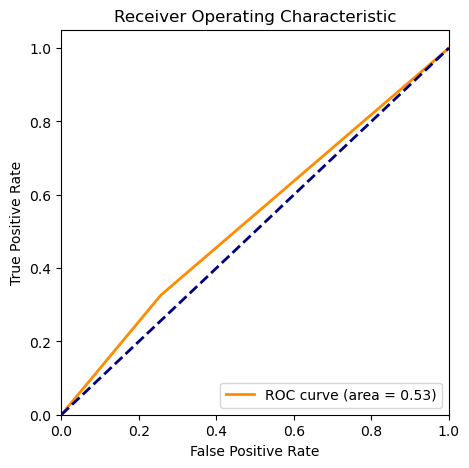

In [38]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_dt)

# Calculate AUC (Area Under the Curve)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print the accuracy and AUC
print("Accuracy:", acc_dt)
print("AUC:", roc_auc_dt)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.legend(loc="lower right")
plt.show()

In [39]:
print("accuracy of Random forest: ",np.round(acc_rf,3))
print("accuracy of Support vector machines: ",np.round(acc_svm,3))
print("accuracy of Bagging classifier: ",np.round(acc_bg,3))
print("accuracy of Decision tree: ",np.round(acc_dt,3))
print("accuracy of Logistic regression: ",np.round(acc_lr,3))


accuracy of Random forest:  0.737
accuracy of Support vector machines:  0.736
accuracy of Bagging classifier:  0.732
accuracy of Decision tree:  0.646
accuracy of Logistic regression:  0.768


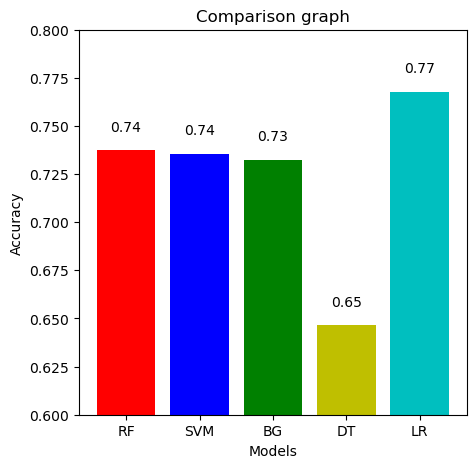

In [40]:
accuracies=[acc_rf,acc_svm,acc_bg,acc_dt,acc_lr]
name=['RF','SVM','BG','DT','LR']
plt.figure(figsize = (5,5))
plt.bar(name,accuracies,color=['r','b','g','y','c'])
plt.xlabel('Models')
plt.ylim(0.6,0.8)
plt.ylabel('Accuracy')
plt.title('Comparison graph')

for i in range(len(name)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')


plt.show()

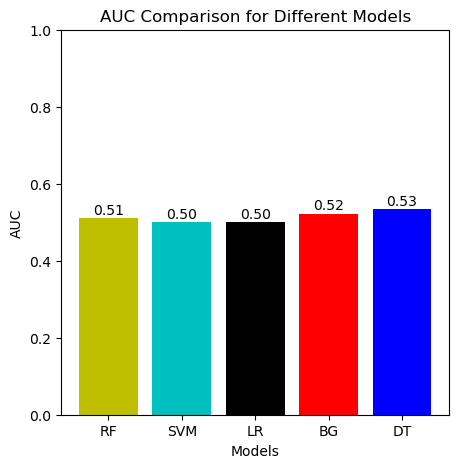

In [41]:

#comparison of different machine learning models in VGG16.

models = ['RF', 'SVM', 'LR', 'BG', 'DT']
auc_values = [roc_auc_rf, roc_auc_svm, roc_auc_lr, roc_auc_bg, roc_auc_dt]  # Replace with your AUC values

plt.figure(figsize=(5, 5))
plt.bar(models, auc_values, color=['y', 'c', 'k', 'r', 'b'])
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Comparison for Different Models')
plt.ylim([0, 1.0])  
for i in range(len(name)):
    plt.text(i, auc_values[i] + 0.01, f'{auc_values[i]:.2f}', ha='center')

plt.show()


In [76]:
auc_values = [roc_auc_rf, roc_auc_svm, roc_auc_lr, roc_auc_bg, roc_auc_dt]
print(auc_values)

[0.51058352402746, 0.5, 0.5, 0.522454233409611, 0.5347540045766591]


In [42]:
#INCEPTION V3

In [43]:
from keras.applications.inception_v3 import InceptionV3

base_model_1 = InceptionV3(include_top=False,
                           weights='imagenet',input_shape=(75,75,3))

fea_train_inc = base_model_1.predict(x_train)

fea_train_inc= fea_train_inc.reshape(fea_train_inc.shape[0], -1)

fea_val_inc= base_model_1.predict(x_test)

fea_val_inc = fea_val_inc.reshape(fea_val_inc.shape[0], -1)

7/7 [==============================] - 0s 43ms/step


In [44]:
model_rf_inc = RandomForestClassifier(3000,verbose = 2)
model_rf_inc.fit(fea_train_inc,y_train)
pred_rf_inc = model_rf_inc.predict(fea_val_inc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 3000
building tree 2 of 3000
building tree 3 of 3000
building tree 4 of 3000
building tree 5 of 3000
building tree 6 of 3000
building tree 7 of 3000
building tree 8 of 3000
building tree 9 of 3000
building tree 10 of 3000
building tree 11 of 3000
building tree 12 of 3000
building tree 13 of 3000
building tree 14 of 3000
building tree 15 of 3000
building tree 16 of 3000
building tree 17 of 3000
building tree 18 of 3000
building tree 19 of 3000
building tree 20 of 3000
building tree 21 of 3000
building tree 22 of 3000
building tree 23 of 3000
building tree 24 of 3000
building tree 25 of 3000
building tree 26 of 3000
building tree 27 of 3000
building tree 28 of 3000
building tree 29 of 3000
building tree 30 of 3000
building tree 31 of 3000
building tree 32 of 3000
building tree 33 of 3000
building tree 34 of 3000
building tree 35 of 3000
building tree 36 of 3000
building tree 37 of 3000
building tree 38 of 3000
building tree 39 of 3000
building tree 40 of 3000
building 

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.1s finished


In [45]:
acc_rf_inc = metrics.accuracy_score(pred_rf_inc,y_test)
acc_rf_inc

0.7676767676767676

Accuracy: 0.7676767676767676
AUC: 0.5379004576659039


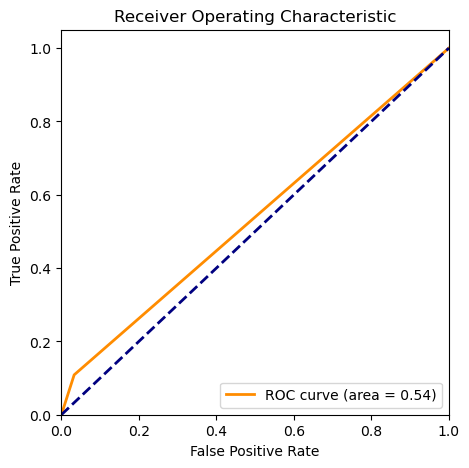

In [46]:
fpr_rf_inc, tpr_rf_inc, thresholds_rf_inc = roc_curve(y_test, pred_rf_inc)

# Calculate AUC (Area Under the Curve)
roc_auc_rf_inc = auc(fpr_rf_inc, tpr_rf_inc)

# Print the accuracy and AUC
print("Accuracy:", acc_rf_inc)
print("AUC:", roc_auc_rf_inc)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_rf_inc, tpr_rf_inc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf_inc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
model_svm_inc = svm.SVC(kernel = 'linear')
model_svm_inc.fit(fea_train_inc,y_train)
svm_pred_inc = model_svm_inc.predict(fea_val_inc)

In [48]:
acc_svm_inc = accuracy_score(svm_pred_inc,y_test)
acc_svm_inc

0.7070707070707071

Accuracy: 0.7070707070707071
AUC: 0.5742276887871854


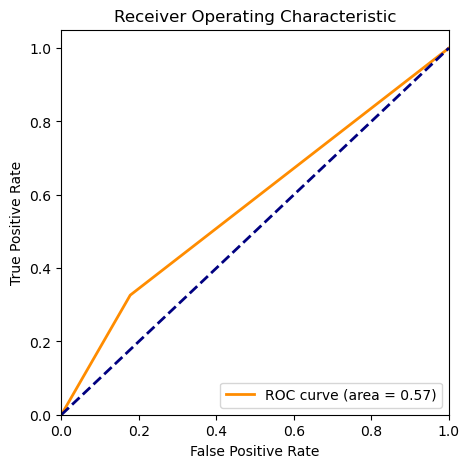

In [49]:
fpr_svm_inc, tpr_svm_inc, thresholds_svm_inc = roc_curve(y_test, svm_pred_inc)

# Calculate AUC (Area Under the Curve)
roc_auc_svm_inc = auc(fpr_svm_inc, tpr_svm_inc)

# Print the accuracy and AUC
print("Accuracy:", acc_svm_inc)
print("AUC:", roc_auc_svm_inc)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_svm_inc, tpr_svm_inc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm_inc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [50]:
model_lr_inc = LogisticRegression()
model_lr_inc.fit(fea_train_inc,y_train)
pred_lr_inc = model_lr_inc.predict(fea_val_inc)

/Users/jainivedhitha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
acc_lr_inc = metrics.accuracy_score(pred_lr_inc,y_test)
acc_lr_inc

0.696969696969697

Accuracy: 0.696969696969697
AUC: 0.5524885583524027


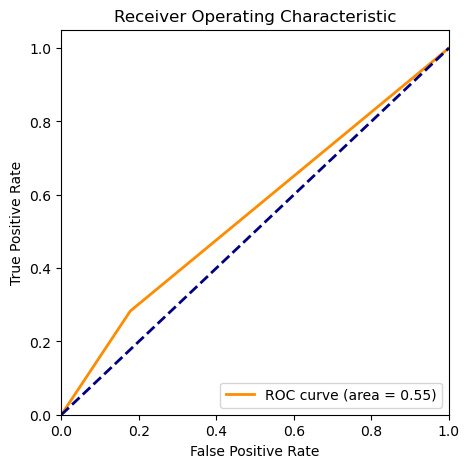

In [52]:
fpr_lr_inc, tpr_lr_inc, thresholds_lr_inc = roc_curve(y_test, pred_lr_inc)

# Calculate AUC (Area Under the Curve)
roc_auc_lr_inc = auc(fpr_lr_inc, tpr_lr_inc)

# Print the accuracy and AUC
print("Accuracy:", acc_lr_inc)
print("AUC:", roc_auc_lr_inc)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_lr_inc, tpr_lr_inc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr_inc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
model_bg_inc = BaggingClassifier(base_estimator = None,n_estimators = 10,
                             max_samples = 1.0,max_features = 1.0,bootstrap = True,
                             bootstrap_features = False, oob_score = False, warm_start = False,
                             n_jobs = None, random_state = 20, verbose = 2)
model_bg_inc.fit(fea_train_inc,y_train)
pred_bg_inc = model_bg_inc.predict(fea_val_inc)

/Users/jainivedhitha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [54]:
acc_bg_inc = metrics.accuracy_score(pred_bg_inc,y_test)
acc_bg_inc

0.7171717171717171

Accuracy: 0.7171717171717171
AUC: 0.5125858123569793


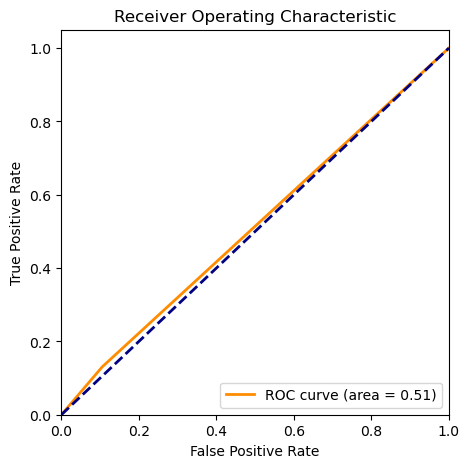

In [55]:
fpr_bg_inc, tpr_bg_inc, thresholds_bg_inc = roc_curve(y_test, pred_bg_inc)

# Calculate AUC (Area Under the Curve)
roc_auc_bg_inc = auc(fpr_bg_inc, tpr_bg_inc)

# Print the accuracy and AUC
print("Accuracy:", acc_bg_inc)
print("AUC:", roc_auc_bg_inc)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_bg_inc, tpr_bg_inc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_bg_inc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
model_dt_inc = DecisionTreeClassifier()

model_dt_inc.fit(fea_train_inc,y_train)

pred_dt_inc = model_dt_inc.predict(fea_val_inc)


In [57]:
acc_dt_inc = metrics.accuracy_score(pred_dt_inc,y_test)
acc_dt_inc

0.6313131313131313

Accuracy: 0.6313131313131313
AUC: 0.5021453089244852


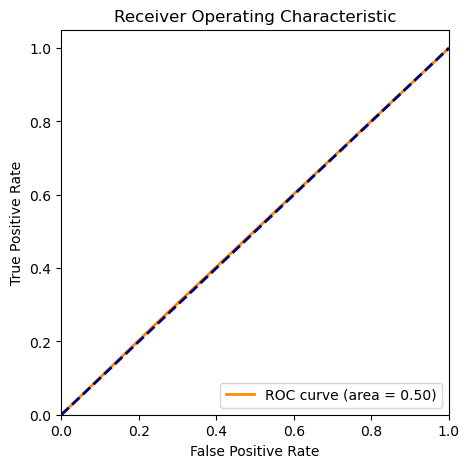

In [58]:
fpr_dt_inc, tpr_dt_inc, thresholds_dt_inc = roc_curve(y_test, pred_dt_inc)

# Calculate AUC (Area Under the Curve)
roc_auc_dt_inc = auc(fpr_dt_inc, tpr_dt_inc)

# Print the accuracy and AUC
print("Accuracy:", acc_dt_inc)
print("AUC:", roc_auc_dt_inc)

# Plot ROC curve
plt.figure(figsize = (5,5))
plt.plot(fpr_dt_inc, tpr_dt_inc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt_inc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
print("accuracy of Random forest: ",np.round(acc_rf_inc,3))
print("accuracy of Support vector machines: ",np.round(acc_svm_inc,3))
print("accuracy of Bagging classifier: ",np.round(acc_bg_inc,3))
print("accuracy of Decision tree: ",np.round(acc_dt_inc,3))
print("accuracy of Logistic regression: ",np.round(acc_lr_inc,3))


accuracy of Random forest:  0.768
accuracy of Support vector machines:  0.707
accuracy of Bagging classifier:  0.717
accuracy of Decision tree:  0.631
accuracy of Logistic regression:  0.697


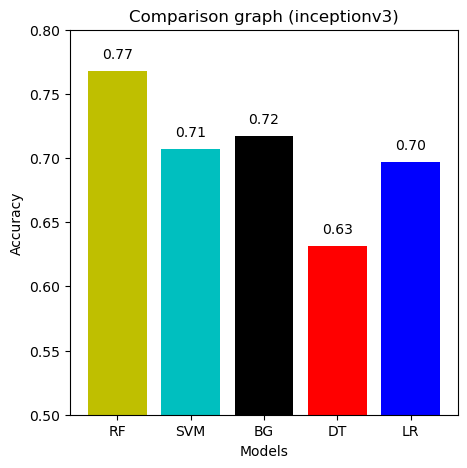

In [60]:
acc_inc=[acc_rf_inc,acc_svm_inc,acc_bg_inc,acc_dt_inc,acc_lr_inc]
name_inc=['RF','SVM','BG','DT','LR']
plt.figure(figsize = (5,5))
plt.bar(name_inc, acc_inc, color=['y', 'c', 'k', 'r', 'b'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5,0.8)
plt.title('Comparison graph (inceptionv3)')

for i in range(len(name)):
    plt.text(i, acc_inc[i] + 0.01, f'{acc_inc[i]:.2f}', ha='center')

plt.show()

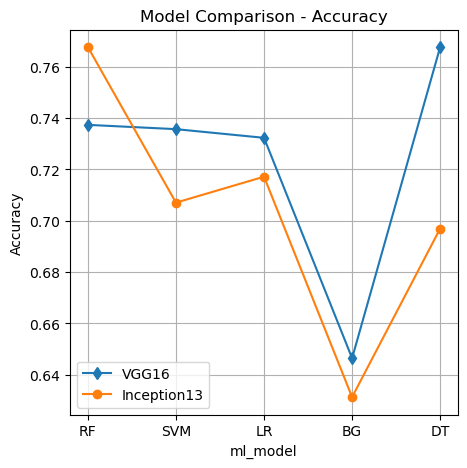

In [61]:
import matplotlib.pyplot as plt


model_names = ['model_vgg', 'model_inc']

accuracy_model1 = accuracies
accuracy_model2 = acc_inc
x_values = ['RF','SVM','LR','BG','DT']
plt.figure(figsize=(5, 5))

plt.plot(x_values, accuracy_model1, marker='d', label='VGG16')
plt.plot(x_values, accuracy_model2, marker='o', label='Inception13')

plt.xlabel('ml_model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.grid(True)
plt.show()


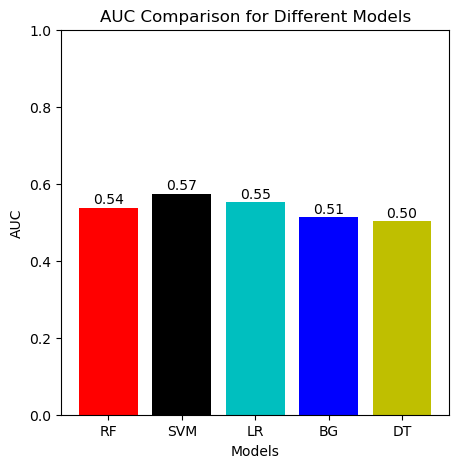

In [62]:
import matplotlib.pyplot as plt
#comparison of different machine learning models in VGG16.

models_inc = ['RF', 'SVM', 'LR', 'BG', 'DT']
auc_values_inc = [roc_auc_rf_inc, roc_auc_svm_inc, roc_auc_lr_inc, roc_auc_bg_inc, roc_auc_dt_inc]
plt.figure(figsize=(5,5))
plt.bar(models_inc, auc_values_inc, color=['r', 'k', 'c', 'b', 'y'])
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Comparison for Different Models')
plt.ylim([0, 1.0])  

for i in range(len(name)):
    plt.text(i, auc_values_inc[i] + 0.01, f'{auc_values_inc[i]:.2f}', ha='center')
plt.show()


In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


cm_rf = confusion_matrix(rf_pred,y_test)
cm_svm = confusion_matrix(svm_pred,y_test)
cm_lr = confusion_matrix(lr_pred,y_test)
cm_bg = confusion_matrix(pred_bg,y_test)
cm_dt = confusion_matrix(pred_dt,y_test)


print("Confusion Matrix of random forest:")
print(cm_rf)
print("Confusion Matrix of support vector machine: ")
print(cm_svm)
print("Confusion Matrix of logistic regression: ")
print(cm_lr)
print("Confusion Matrix of bagging classifier: ")
print(cm_bg)
print("Confusion Matrix of decision tree: ")
print(cm_dt)

Confusion Matrix of random forest:
[[142  42]
 [ 10   4]]
Confusion Matrix of support vector machine: 
[[152  46]
 [  0   0]]
Confusion Matrix of logistic regression: 
[[152  46]
 [  0   0]]
Confusion Matrix of bagging classifier: 
[[139  40]
 [ 13   6]]
Confusion Matrix of decision tree: 
[[113  31]
 [ 39  15]]


In [75]:
cm_rf_inc = confusion_matrix(pred_rf_inc,y_test)
cm_svm_inc = confusion_matrix(svm_pred_inc,y_test)
cm_lr_inc = confusion_matrix(pred_lr_inc,y_test)
cm_bg_inc = confusion_matrix(pred_bg_inc,y_test)
cm_dt_inc = confusion_matrix(pred_dt_inc,y_test)


print("Confusion Matrix of random forest:")
print(cm_rf_inc)
print("Confusion Matrix of support vector machine: ")
print(cm_svm_inc)
print("Confusion Matrix of logistic regression: ")
print(cm_lr_inc)
print("Confusion Matrix of bagging classifier: ")
print(cm_bg_inc)
print("Confusion Matrix of decision tree: ")
print(cm_dt_inc)

Confusion Matrix of random forest:
[[147  41]
 [  5   5]]
Confusion Matrix of support vector machine: 
[[125  31]
 [ 27  15]]
Confusion Matrix of logistic regression: 
[[125  33]
 [ 27  13]]
Confusion Matrix of bagging classifier: 
[[136  40]
 [ 16   6]]
Confusion Matrix of decision tree: 
[[113  34]
 [ 39  12]]


In [77]:
auc_values_inc = [roc_auc_rf_inc, roc_auc_svm_inc, roc_auc_lr_inc, roc_auc_bg_inc, roc_auc_dt_inc]
print(auc_values_inc)

[0.5379004576659039, 0.5742276887871854, 0.5524885583524027, 0.5125858123569793, 0.5021453089244852]
